In [1]:
import math

In [2]:
def read_data(path, threshold=None):
    with open(path, "tr") as file:
        text_lines = file.readlines()
        data_lines = []
        for text_line in text_lines:
            data = float(text_line)
            # 当扇叶切换时，delta_angle都大于3，其余情况下总是小于0.5
            if threshold is None or math.fabs(data) < threshold:
                data_lines.append(data)
        return data_lines

In [3]:
angles = read_data("EnergyChallengeData.angles.txt")
delta_angles_10ms = read_data("EnergyChallengeData.delta_angles.txt", 0.05)
delta_angles_100ms = read_data("EnergyChallengeData.100ms_integral.txt", 0.5)

In [4]:
import pandas as pd

In [5]:
# 显示待击打装甲板的位置数值（弧度）
pd.DataFrame(angles)

0
0     0.146628
1     0.498684
2     0.514701
3     0.521223
4     0.529213
...        ...
9874  4.212506
9875  4.225640
9876  4.239543
9877  4.241735
9878  4.258911

[9879 rows x 1 columns]

In [6]:
# 显示待击打的装机版在10ms上累积转动的角度值（弧度）
pd.DataFrame(delta_angles_10ms)

0
0    -0.016017
1    -0.006522
2    -0.007990
3    -0.015883
4    -0.008124
...        ...
9673 -0.002720
9674 -0.013134
9675 -0.013903
9676 -0.002192
9677 -0.017176

[9678 rows x 1 columns]

In [7]:
# 显示待击打的装机版在100ms上累积转动的角度值（弧度）
pd.DataFrame(delta_angles_100ms)

0
0    -0.439417
1    -0.101064
2    -0.097894
3    -0.100104
4    -0.102174
...        ...
8926 -0.104247
8927 -0.109884
8928 -0.114451
8929 -0.111597
8930 -0.113549

[8931 rows x 1 columns]

In [8]:
import matplotlib.pyplot as plt

In [20]:
# 显示采样时刻待击打扇叶的位置，其除切换导致的跳跃外，应当贴近余弦曲线
plt.figure(figsize=(16, 8))
plt.scatter(range(0, len(angles)), angles, c='r')
plt.title("Angle")
plt.show()

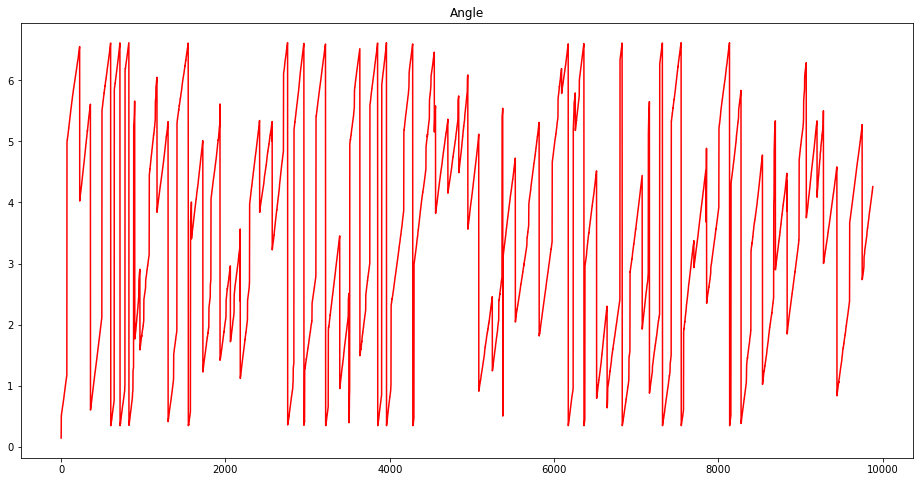

In [17]:
# 显示采样时刻待击打扇叶的位置，其除切换导致的跳跃外，应当贴近余弦曲线
plt.figure(figsize=(16, 8))
plt.plot(range(0, len(angles)), angles, c='r')
plt.title("Angle")
plt.show()

In [15]:
plt.figure(figsize=(16, 8))
plt.plot(range(0, len(delta_angles_10ms)), delta_angles_10ms, c='r')
ax = plt.gca()
# 小能量机关1分钟转10圈，即62.8318rad/min = 1.04719755 rad/s
# 在10ms的时间上，小能量机关的扇叶应当累积转动0.010471975，该数据来自逆时针转动，故取负
ax.hlines(y=-0.010471975, xmin=-1000, xmax=len(delta_angles_10ms) + 1000)
plt.title("Delta Angle Intergral on 10ms")
plt.show()

In [16]:
plt.figure(figsize=(16, 8))
plt.plot(range(0, len(delta_angles_100ms)), delta_angles_100ms, c='r')
ax = plt.gca()
# 小能量机关1分钟转10圈，即62.8318rad/min = 1.04719755 rad/s
# 在100ms的时间上，小能量机关的扇叶应当累积转动0.10471975，该数据来自逆时针转动，故取负
ax.hlines(y=-0.10471975, xmin=-1000, xmax=len(delta_angles_100ms) + 1000)
plt.title("Delta Angle Intergral on 100ms")
plt.show()